<a href="https://colab.research.google.com/github/oputapray2/yolov9/blob/main/YOLOV9_Code_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
folder_path = '/content/gdrive/MyDrive/yolov9'
os.makedirs(folder_path, exist_ok=True)

In [ ]:
import os
os.chdir(folder_path)

In [ ]:
!nvidia-smi

Mon Jul 22 21:57:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 11.62 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/gdrive/MyDrive/yolov9/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.2 MB/s eta 0:00:00


In [ ]:
!pip install roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00


In [ ]:

!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402426
-rw------- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw------- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw------- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw------- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:

%cd /content/gdrive/MyDrive/yolov9/yolov9

/content/gdrive/MyDrive/yolov9/yolov9


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ijj85cG7Ghzf8nQqcn4O")
project = rf.workspace("university-of-salford-kcjdz").project("object-detection-waesi")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-1 in yolov9:: 100%|██████████| 712/712 [00:05<00:00, 133.70it/s]


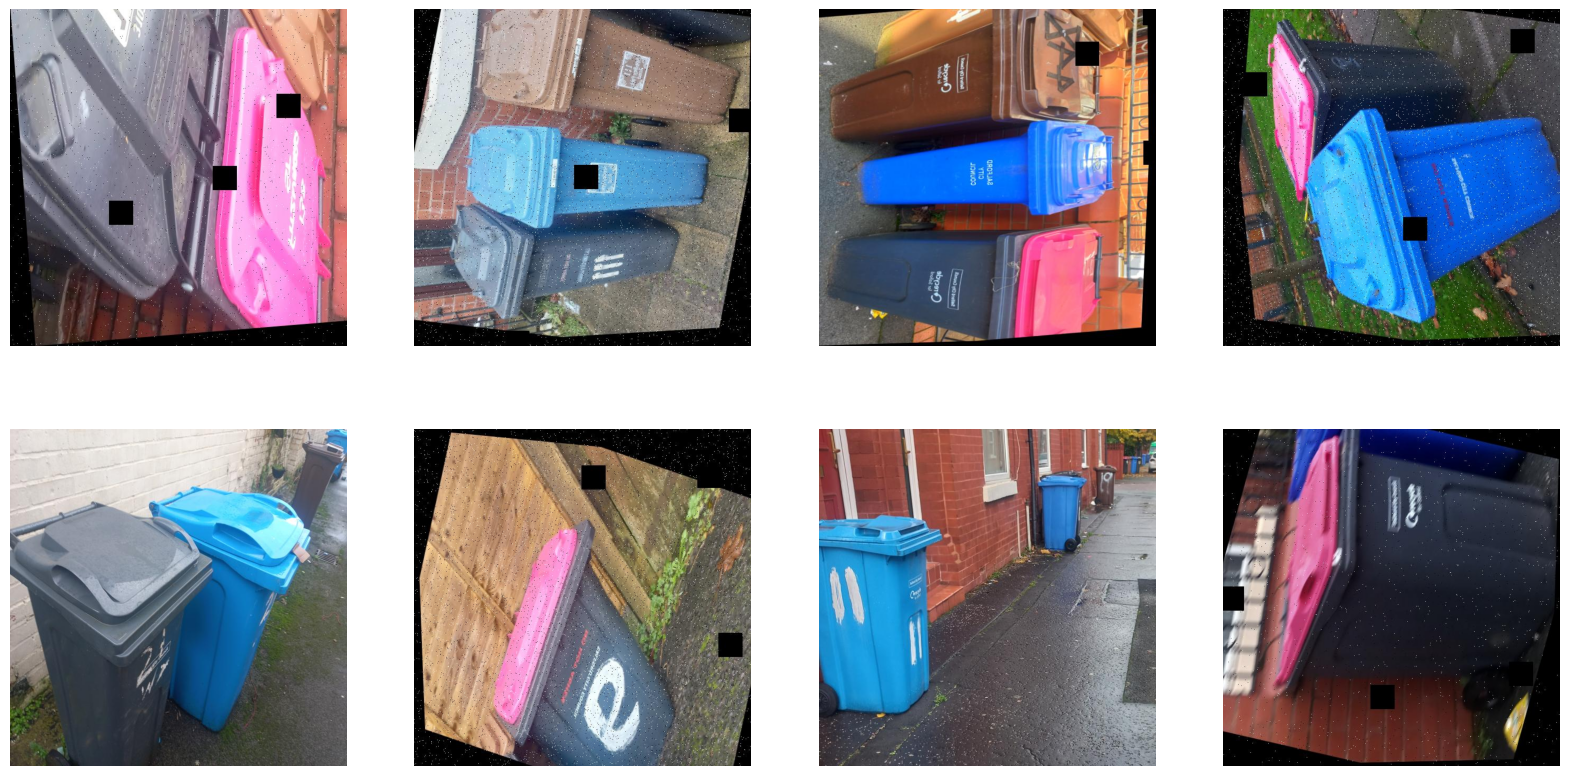

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the images folder
images_folder = '/content/gdrive/MyDrive/YOLOV9_Dataset/dataset/train/images'

# Function to load and display images
def display_images(image_paths):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Get a list of all image paths in the training folder
image_paths = [os.path.join(images_folder, filename) for filename in os.listdir(images_folder) if filename.endswith('.jpg')]
# Shuffle the list of image paths
random.shuffle(image_paths)

# Select 8 random image paths
random_image_paths = image_paths[:8]

# Display the random images
display_images(random_image_paths)

In [ ]:
%cd /content/gdrive/MyDrive/yolov9/yolov9

!python train.py \
--batch 16 --epochs 30 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/data.yaml \
--weights /content/gdrive/MyDrive/yolov9/yolov9/{HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/gdrive/MyDrive/yolov9/yolov9
2024-07-22 22:01:08.122059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 22:01:08.122113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 22:01:08.242356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 22:01:08.344356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07

In [ ]:
!ls /content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/

confusion_matrix.png				    opt.yaml	  train_batch0.jpg
events.out.tfevents.1721685672.80d63edcd4cb.2660.0  P_curve.png   train_batch1.jpg
F1_curve.png					    PR_curve.png  train_batch2.jpg
hyp.yaml					    R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				    results.csv   val_batch0_pred.jpg
labels.jpg					    results.png   weights


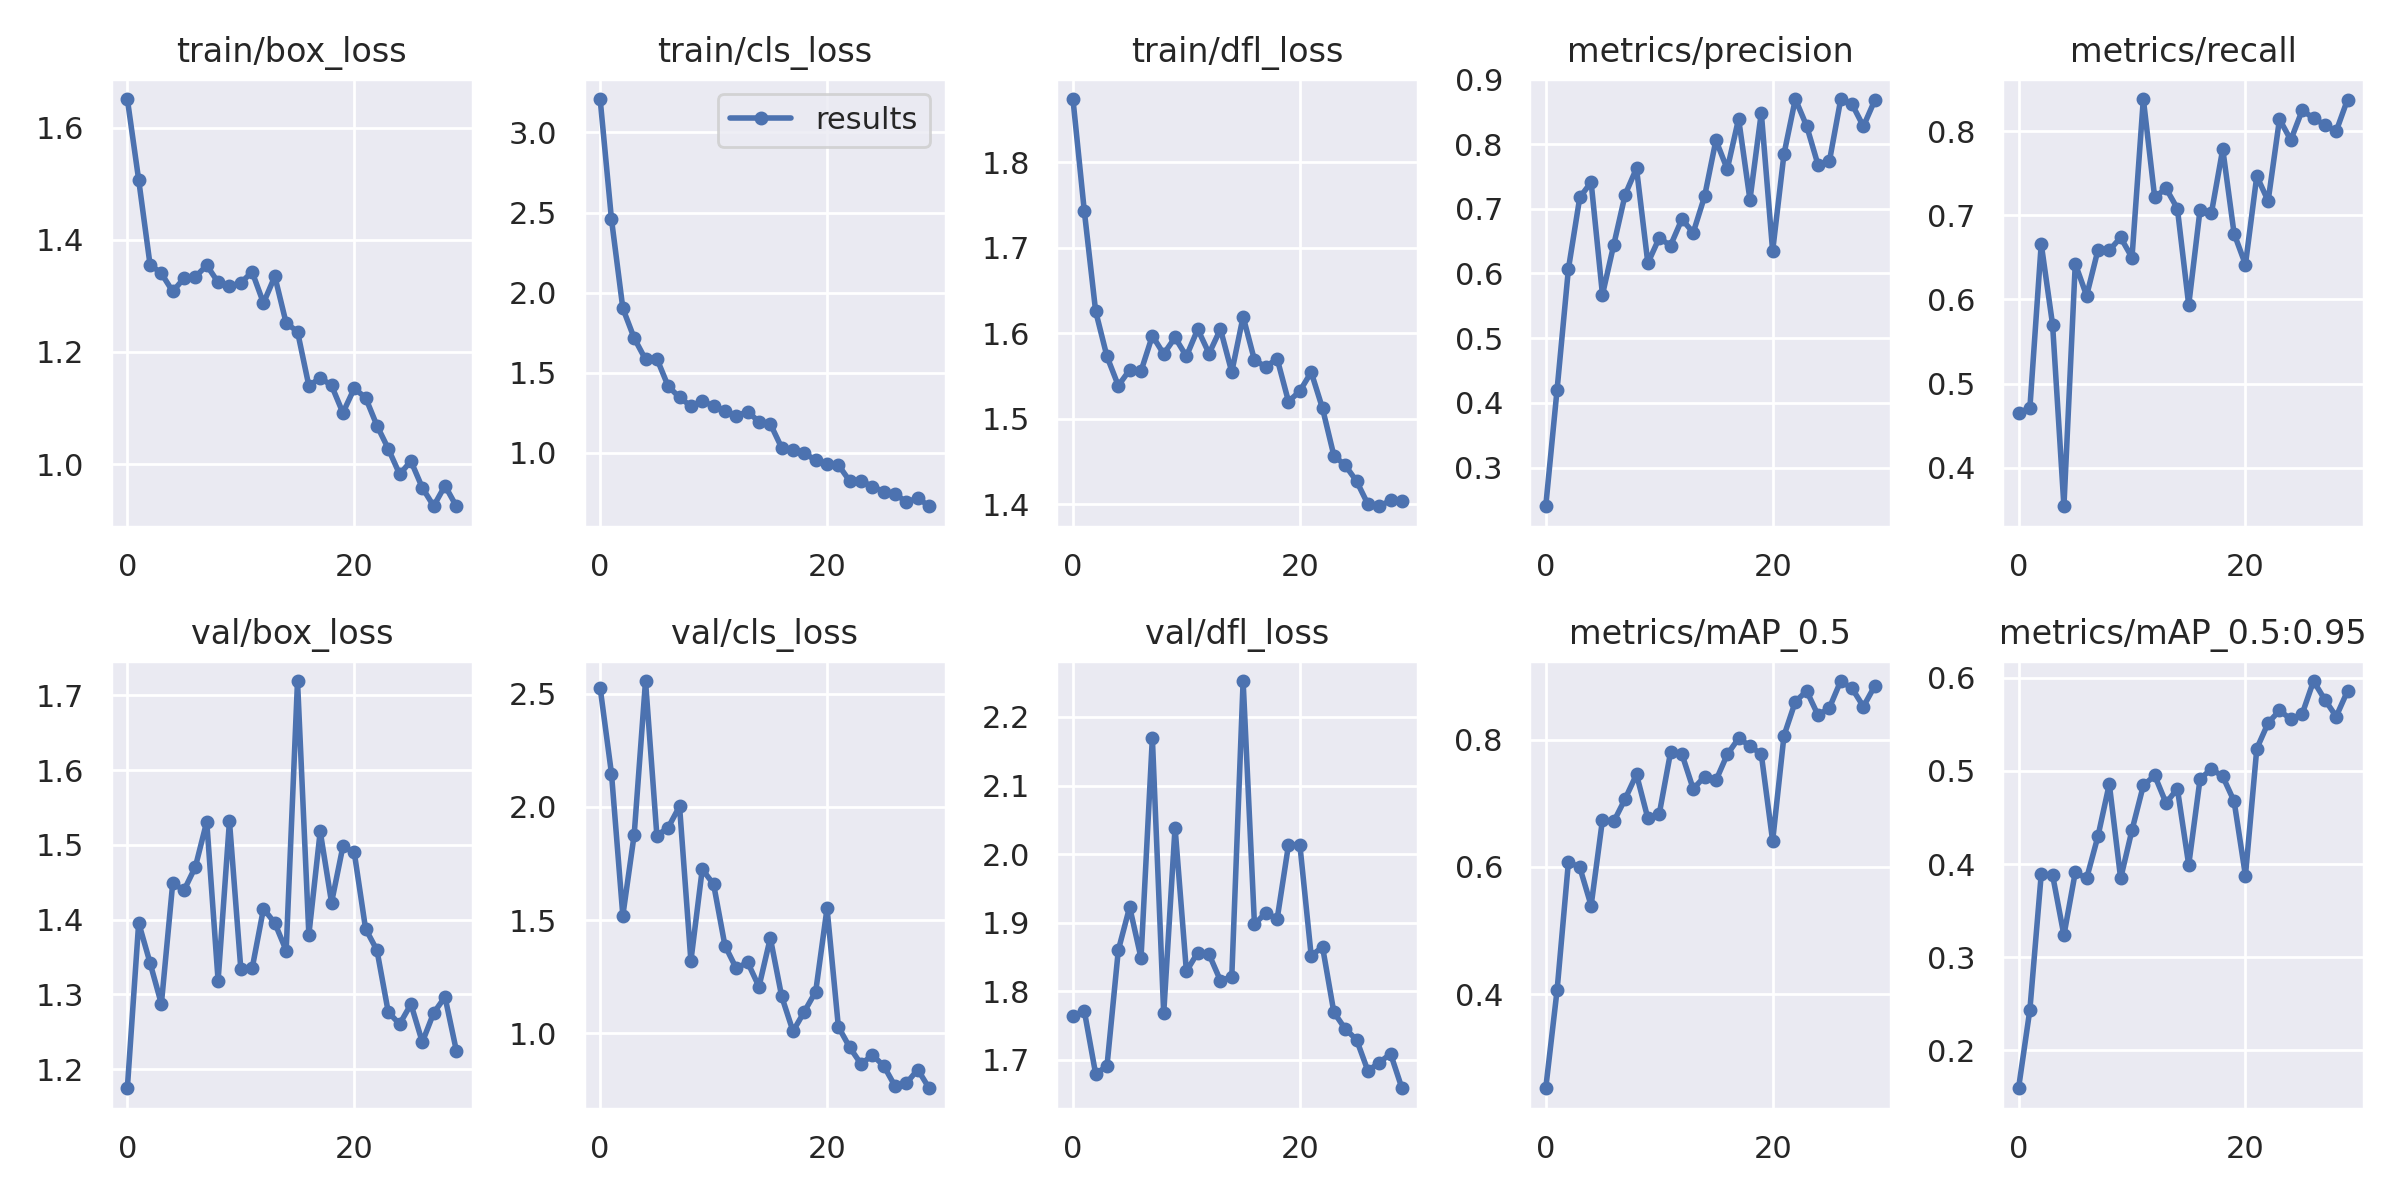

In [ ]:
from IPython.display import Image

Image(filename=f"/content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/results.png", width=1000)

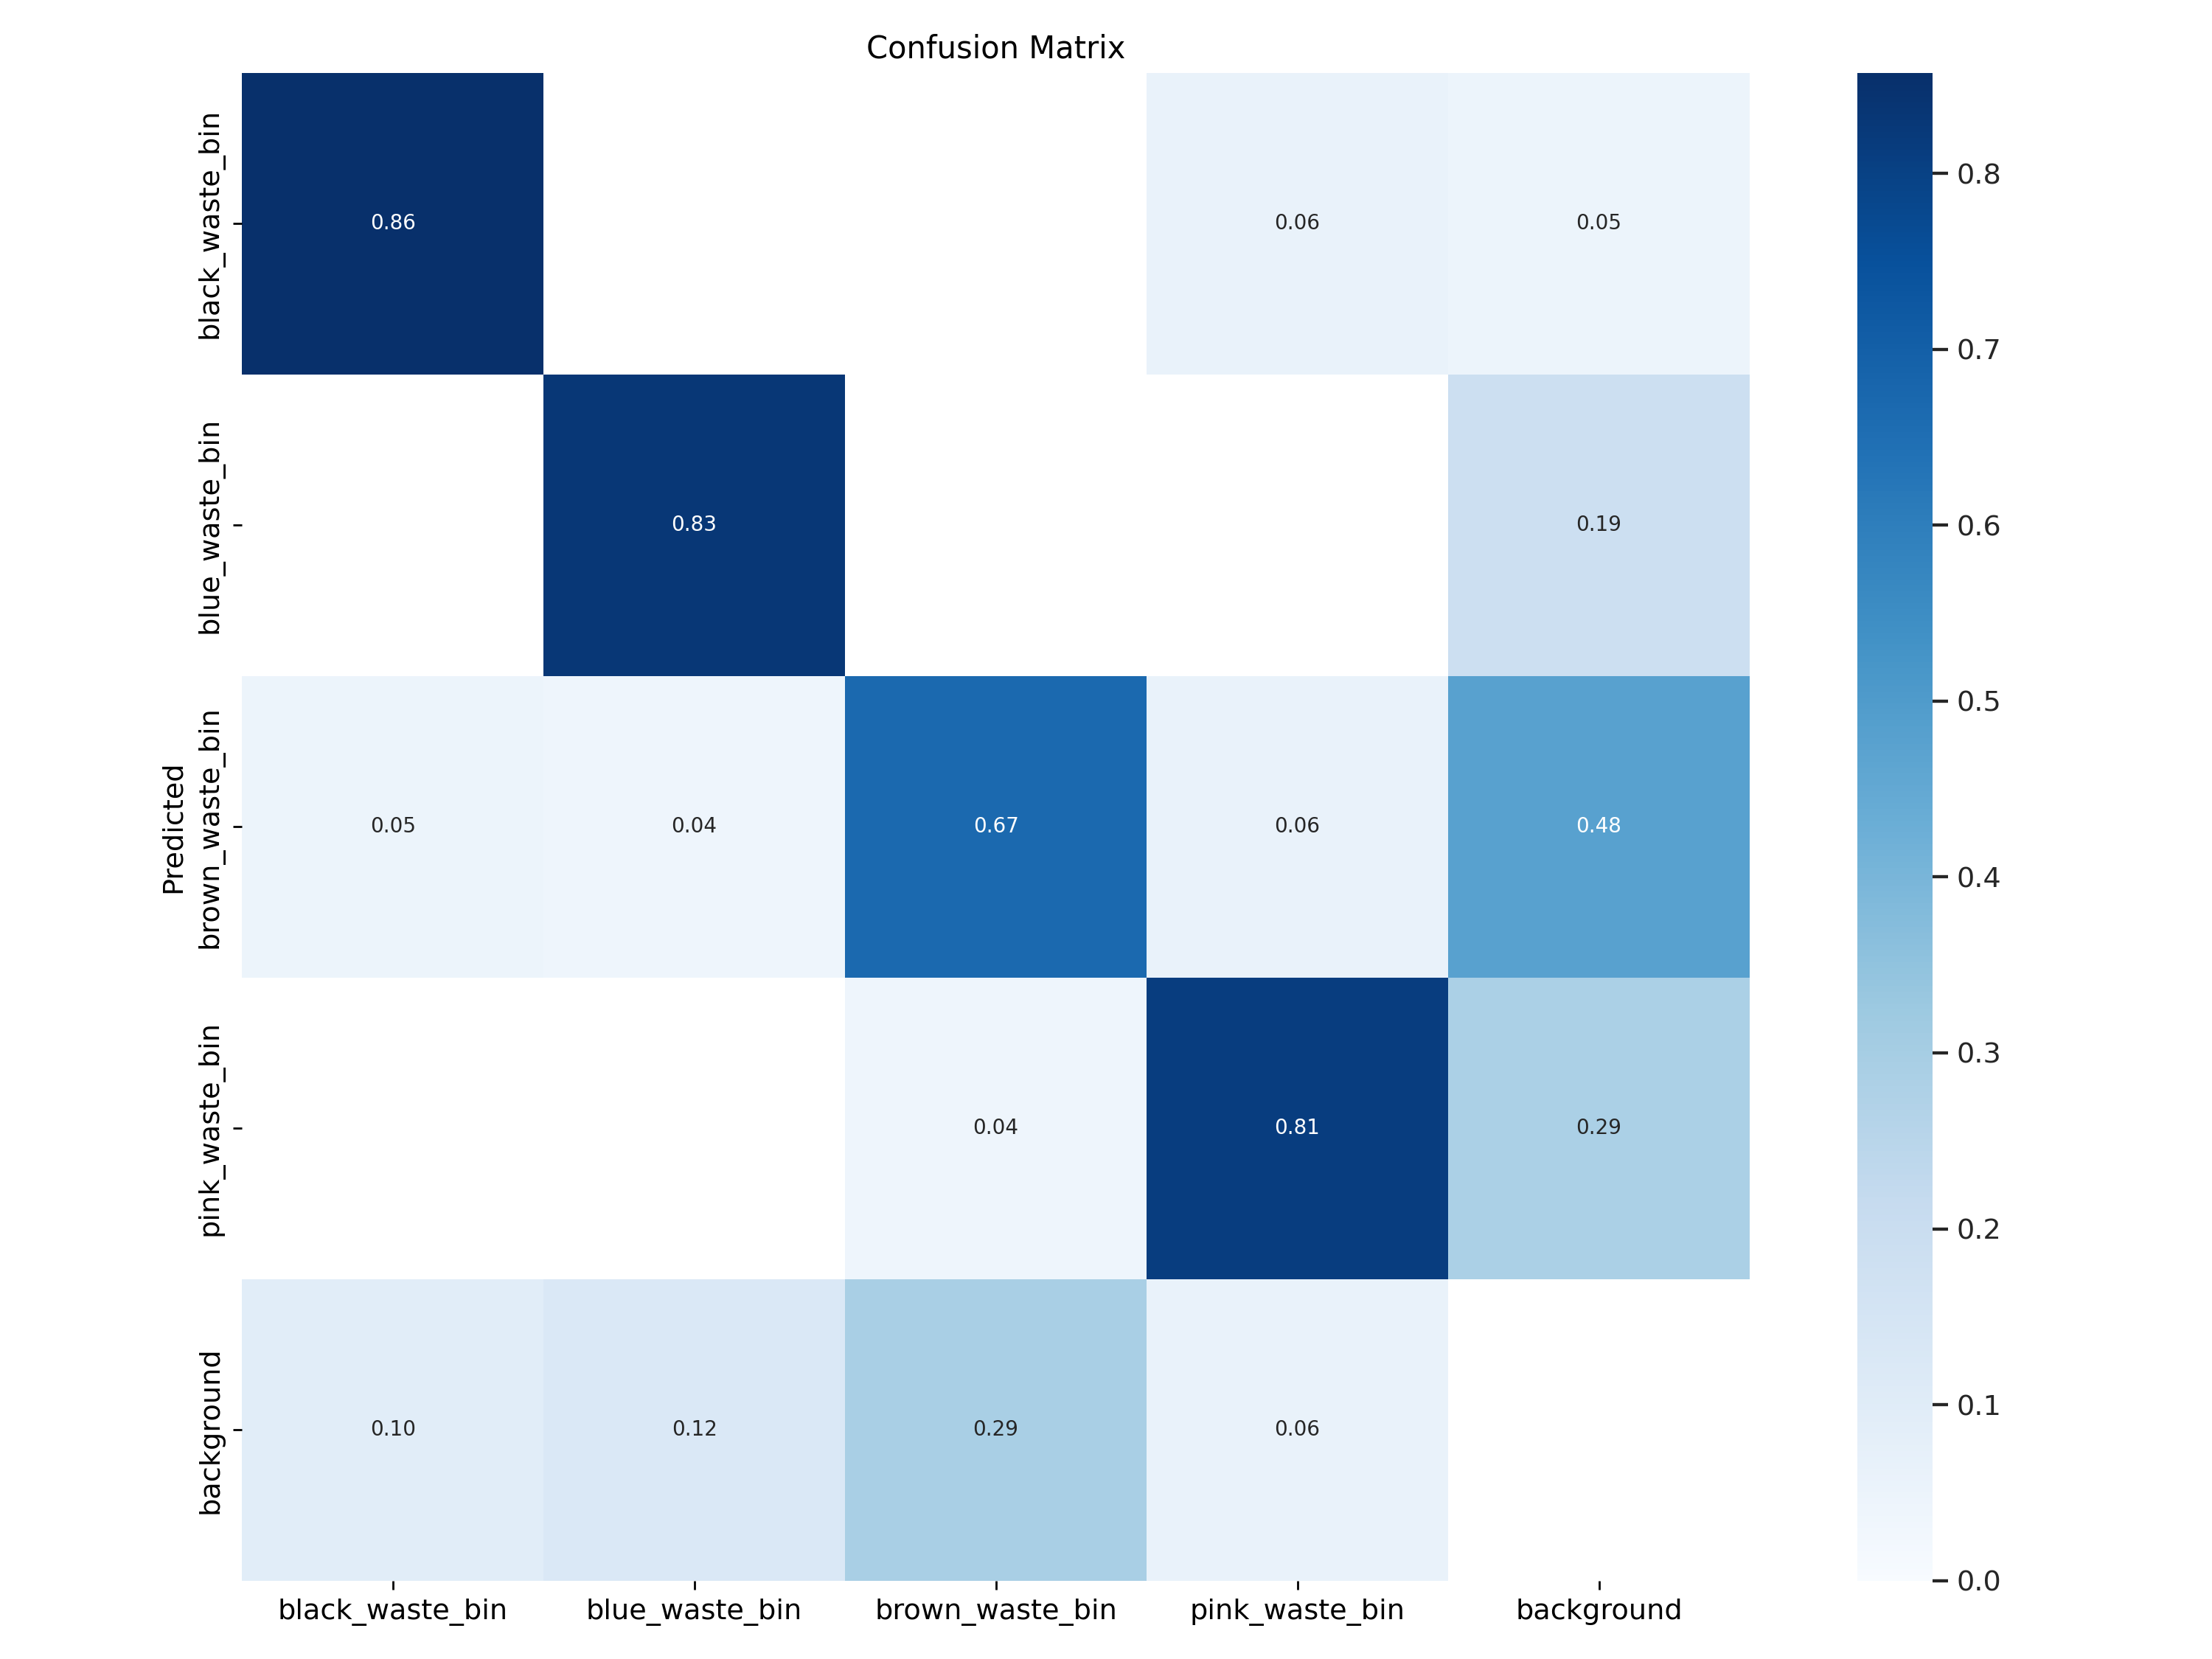

In [ ]:
Image(filename=f"/content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

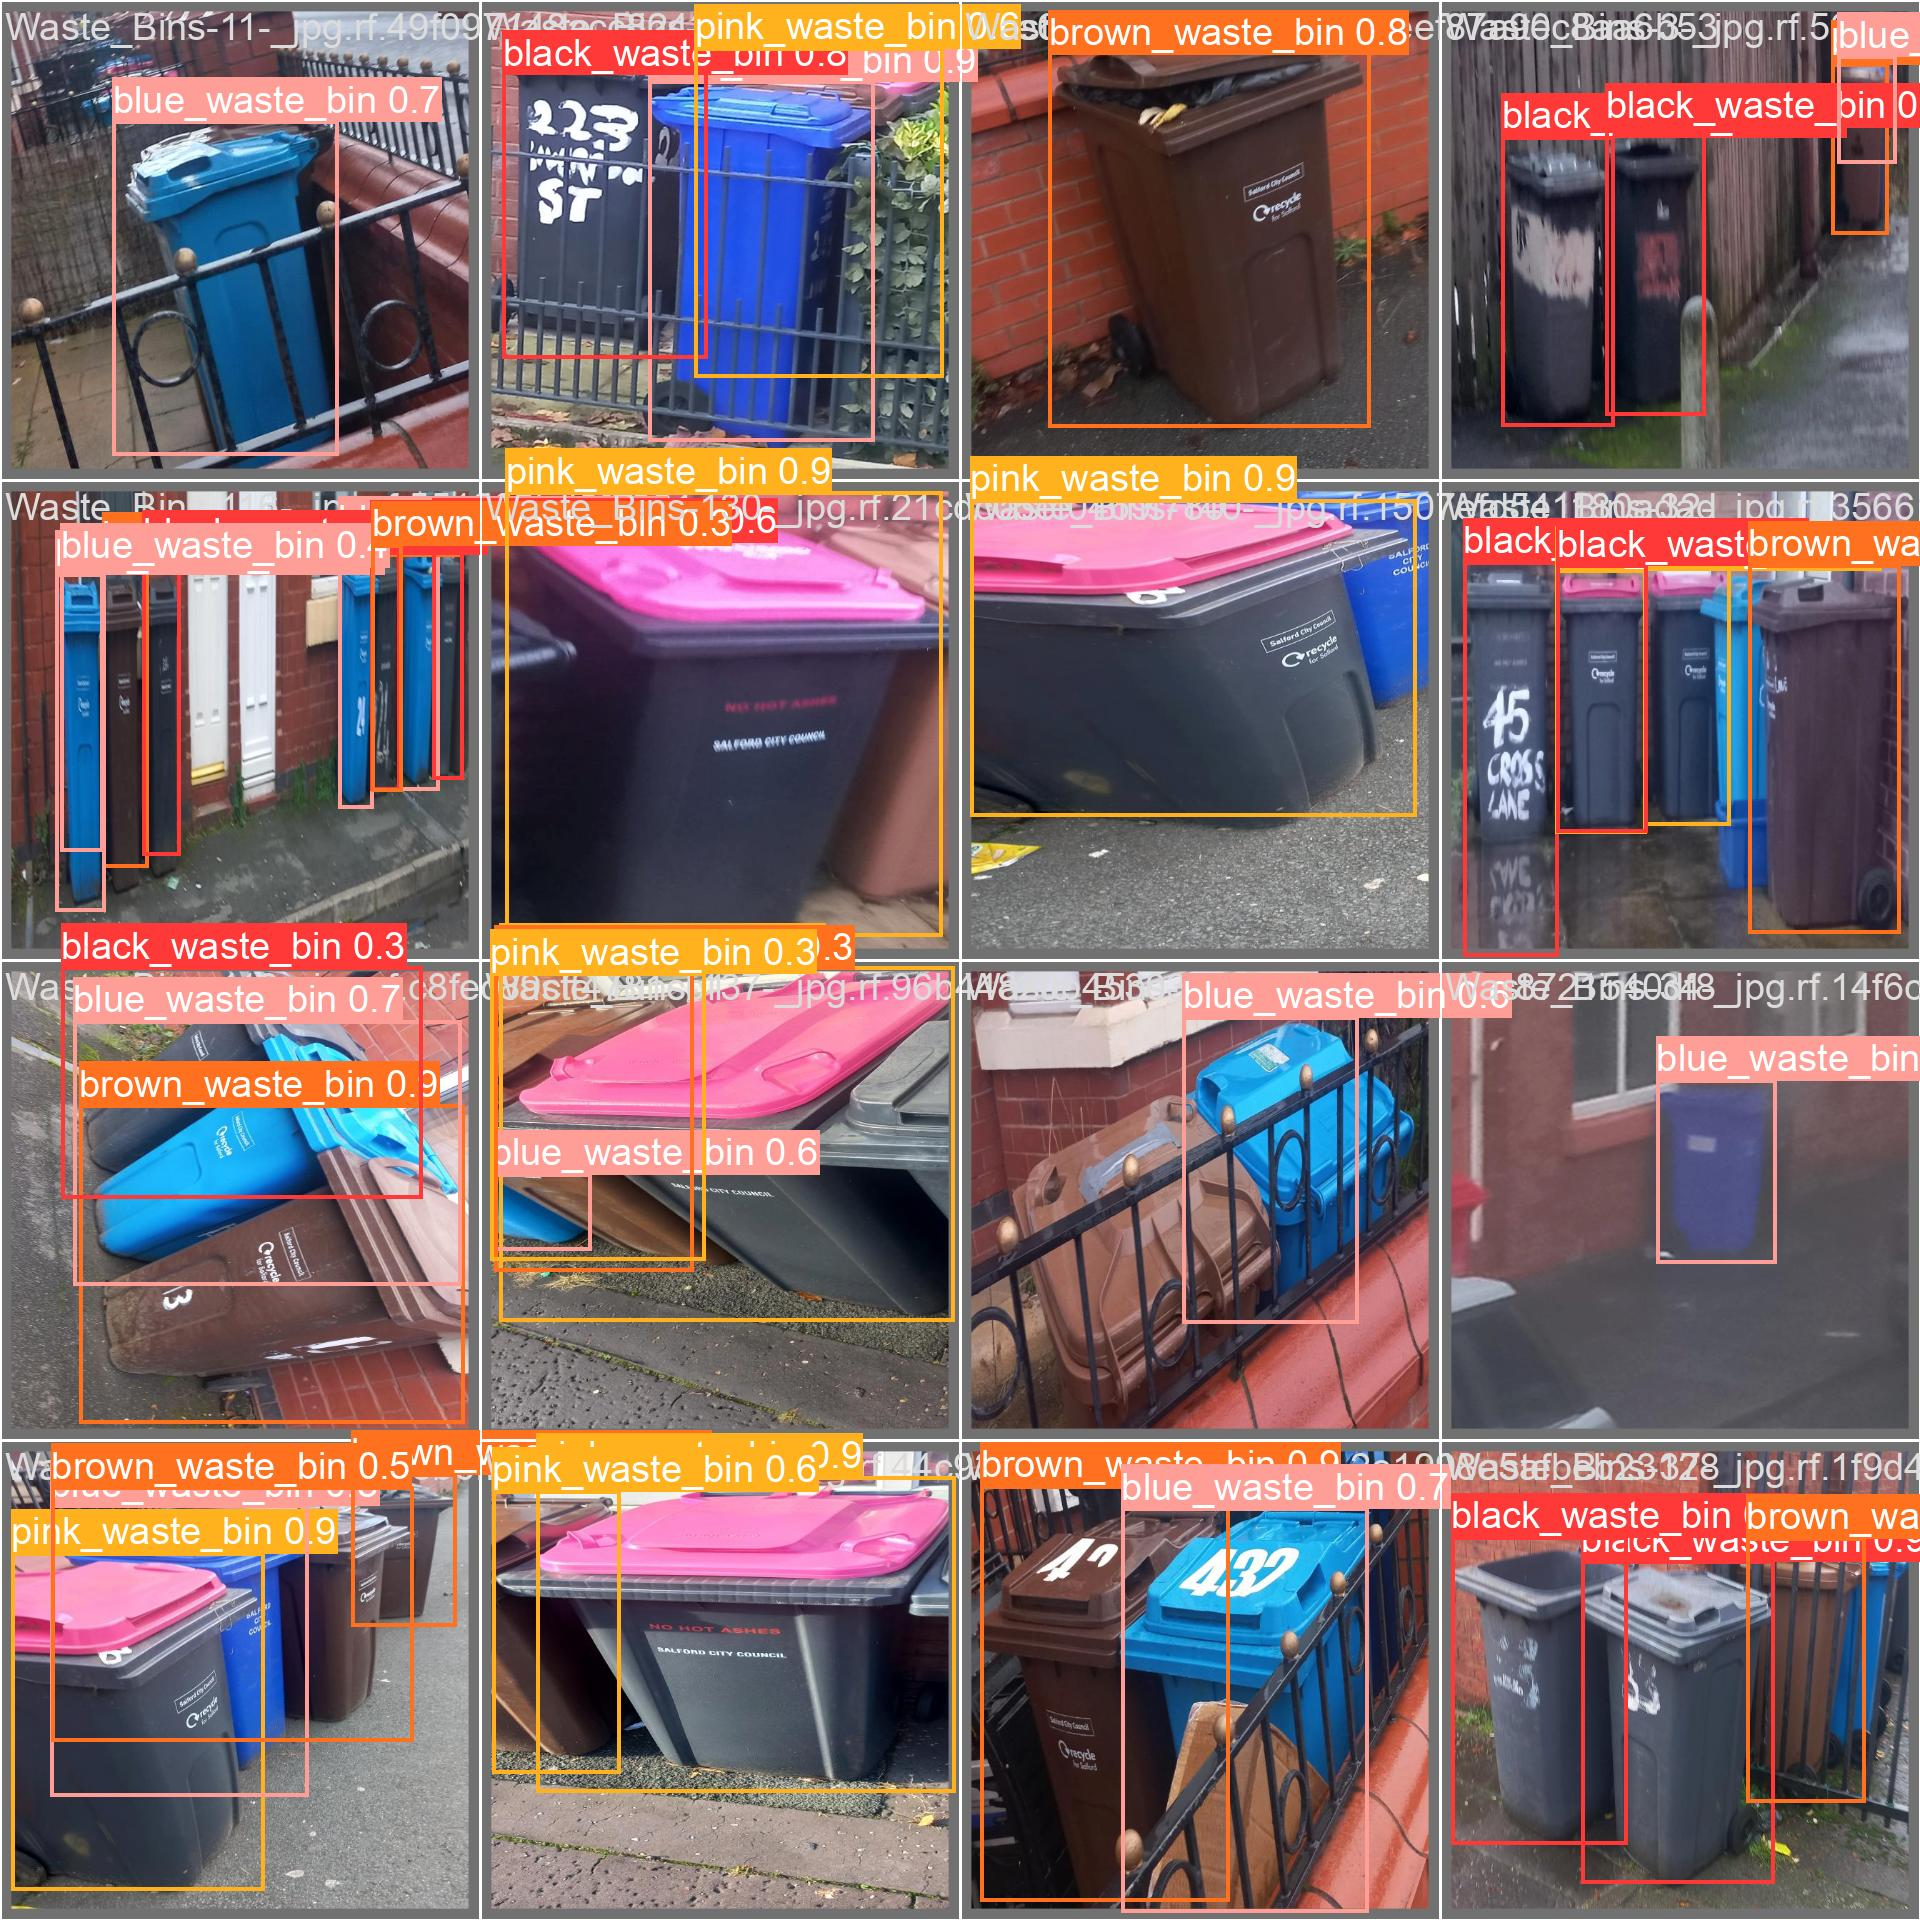

In [ ]:
Image(filename=f"/content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [ ]:
%cd /content/gdrive/MyDrive/yolov9/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/data.yaml \
--weights /content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/weights/best.pt

/content/gdrive/MyDrive/yolov9/yolov9
val: data=/content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/data.yaml, weights=['/content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:03<00:00,  3.27s/it]
                   all         30         85    

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights /content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/weights/best.pt \
--source /content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/test/images

detect: weights=['/content/gdrive/MyDrive/yolov9/yolov9/runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/23 /content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-1/test/images/Waste_Bins-101-_jpg.rf.a7ab996cc38224fbd89810bb1d2e2679.jpg: 1280x1280 1 blue_waste_bin, 2 brown_waste_bins, 145.2ms
image 2/23 /content/gdrive/MyDrive/yolov9/yolov9/Object-Detection-

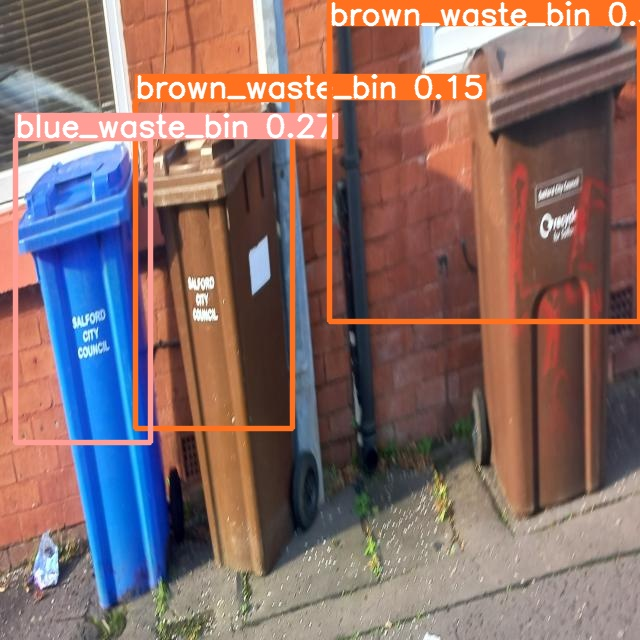

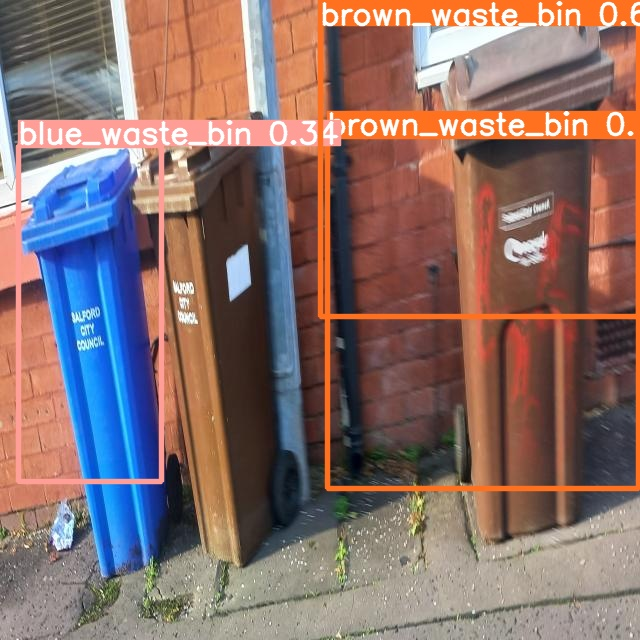

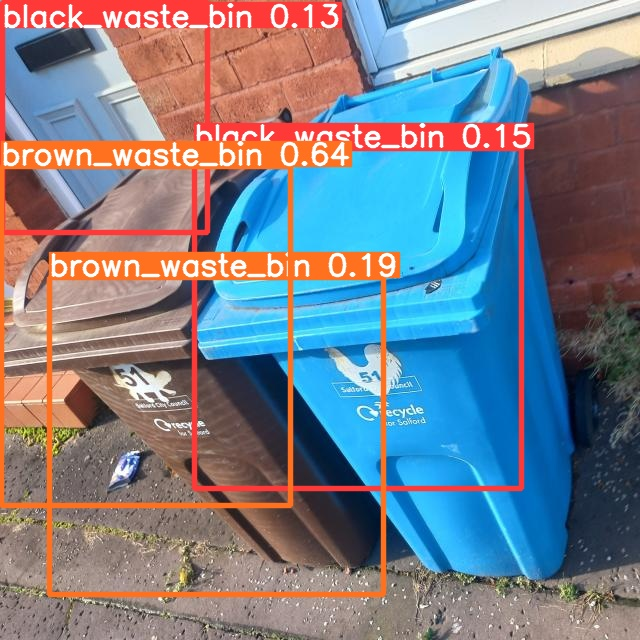

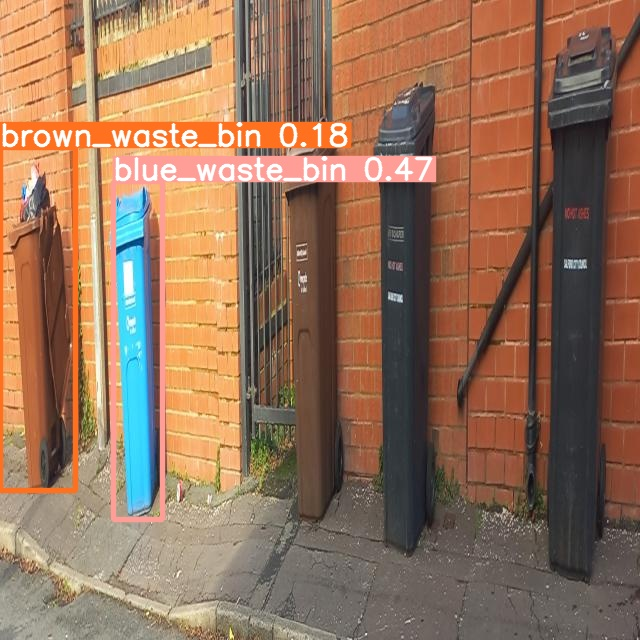

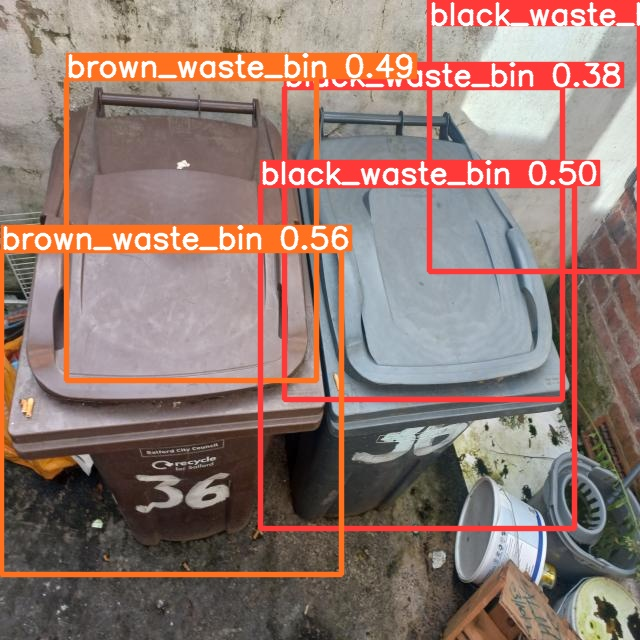

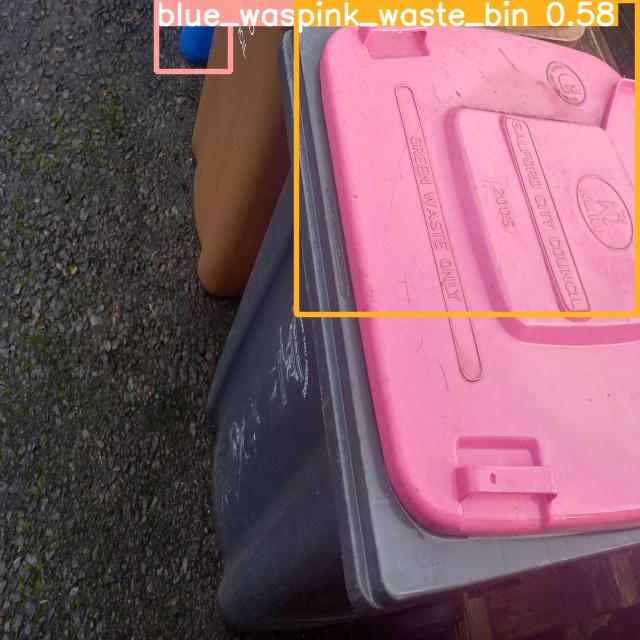

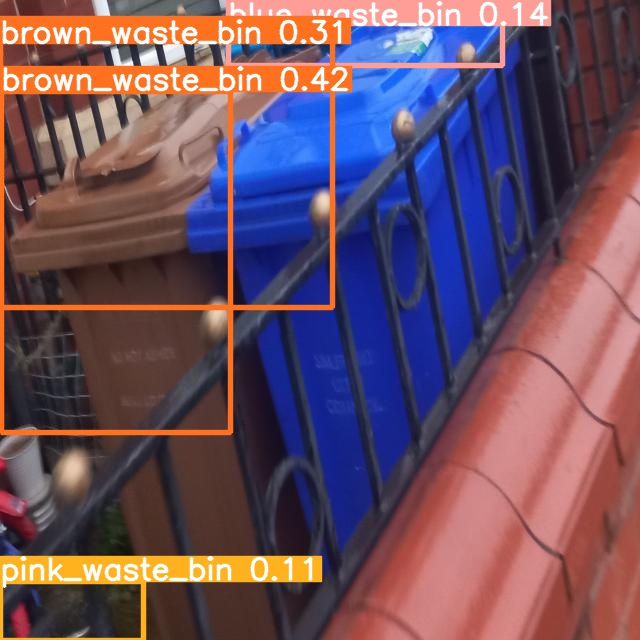

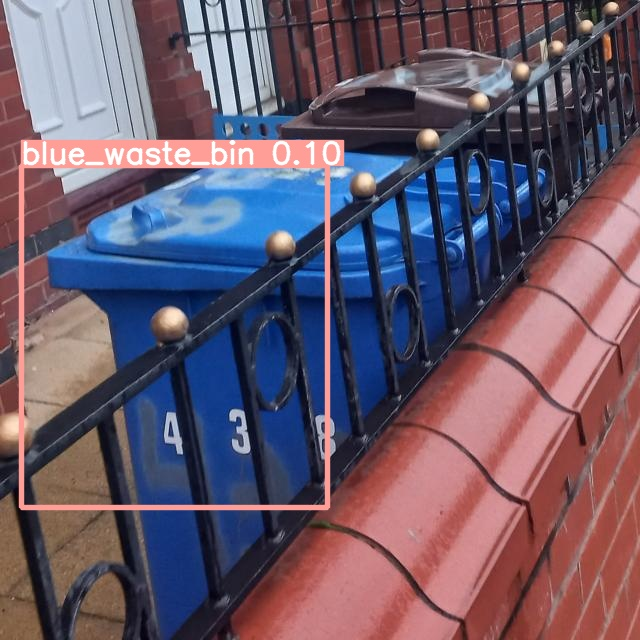

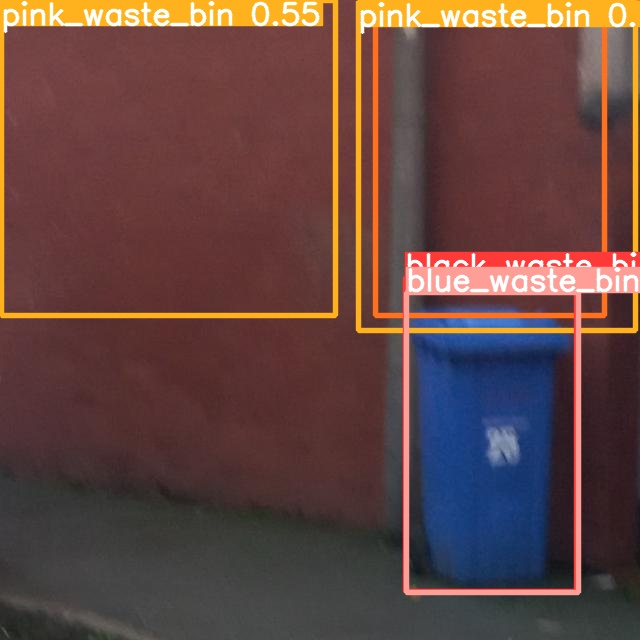

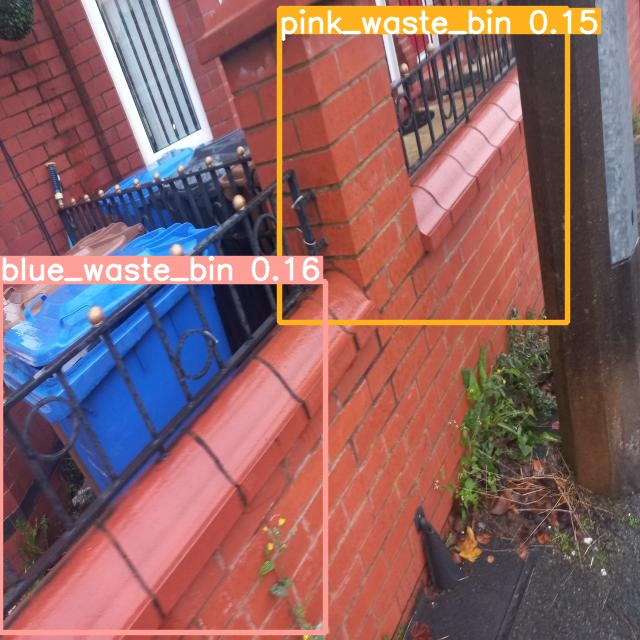

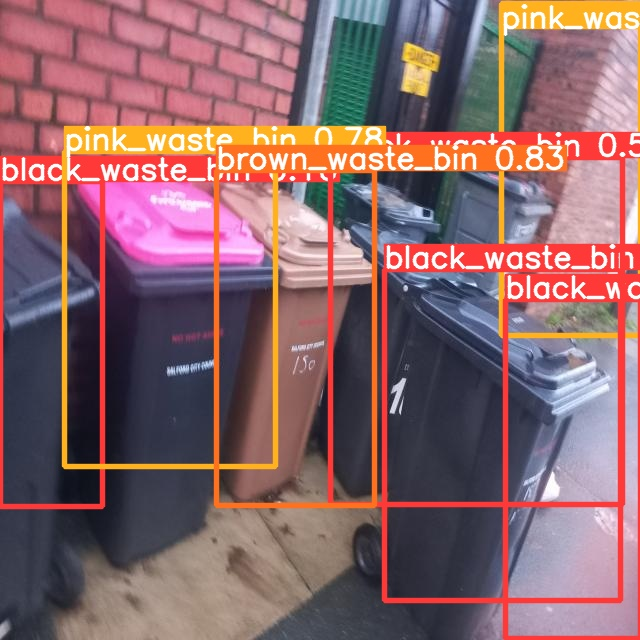

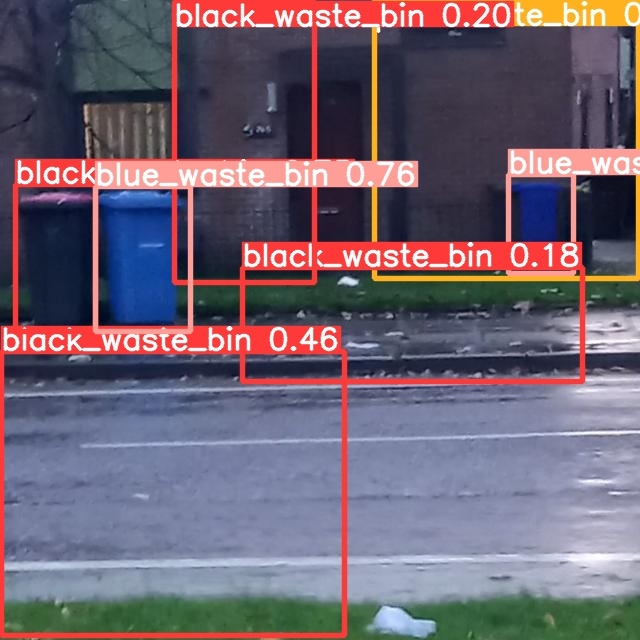

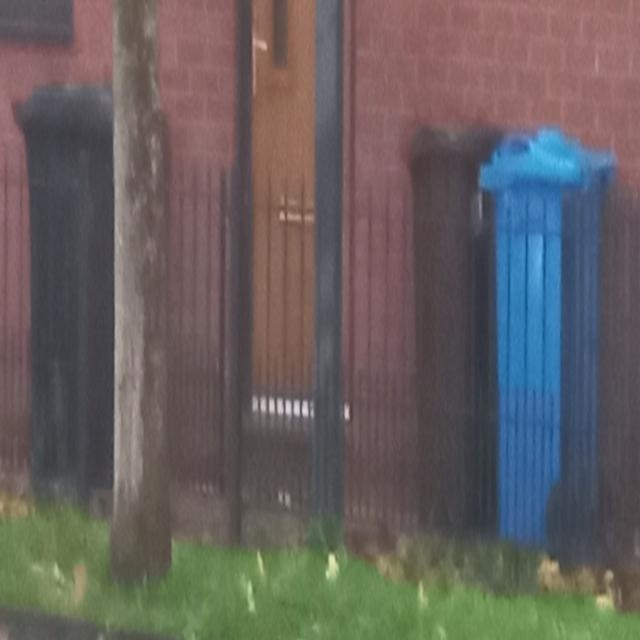

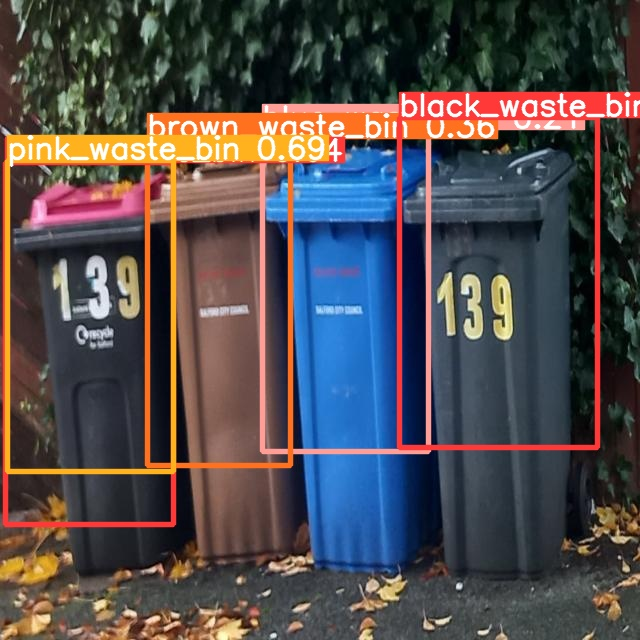

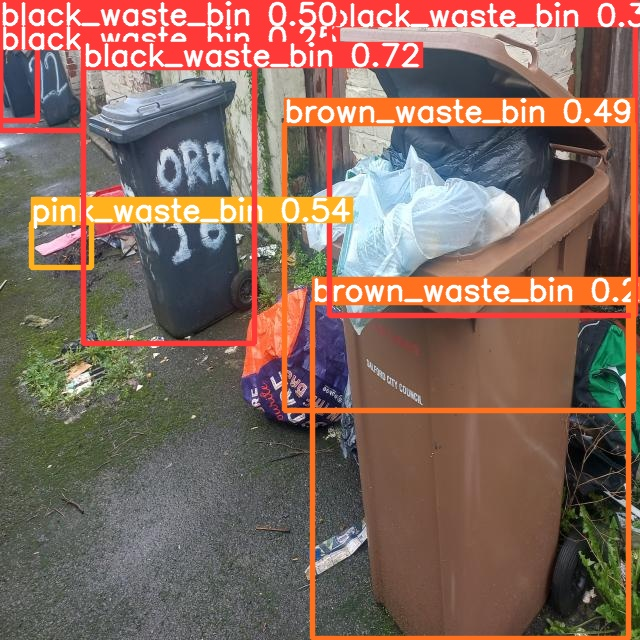

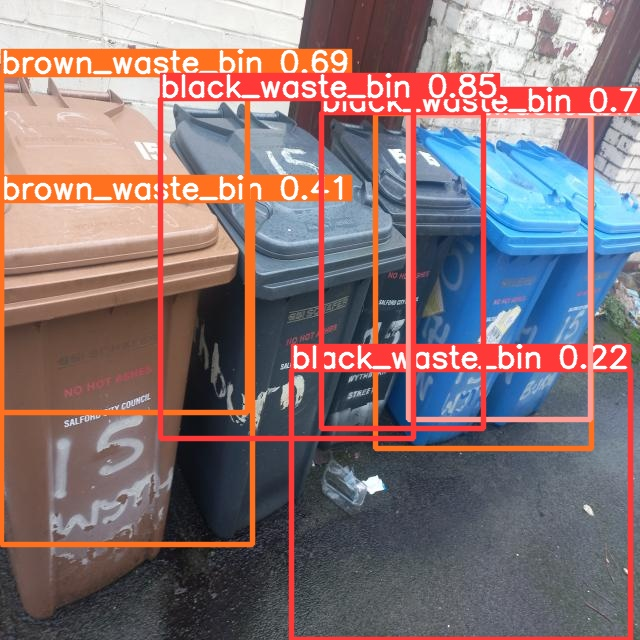

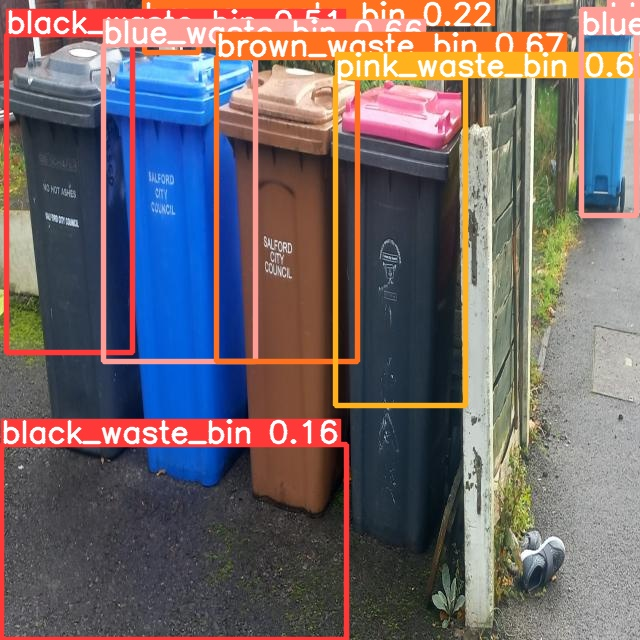

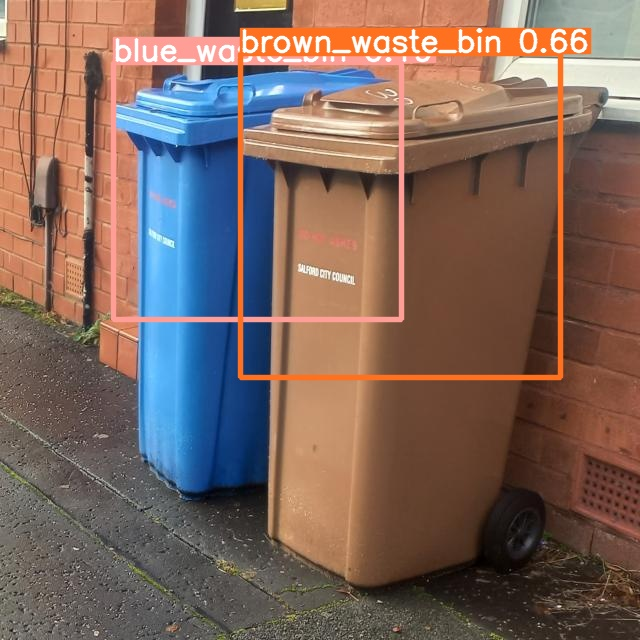

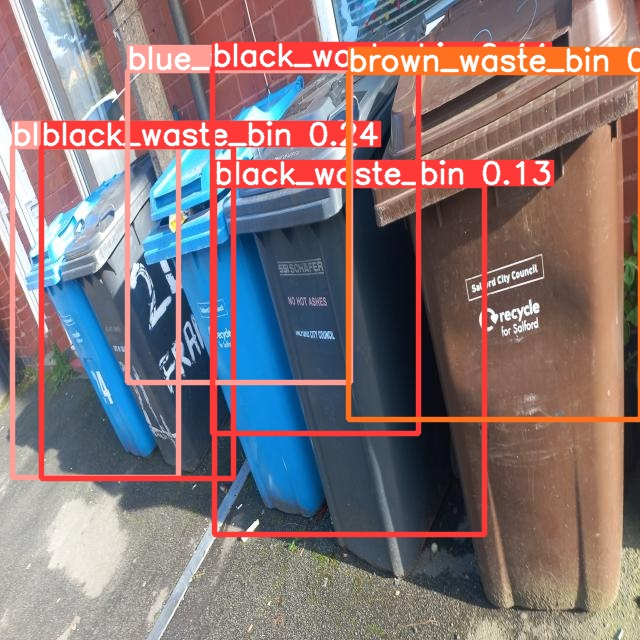

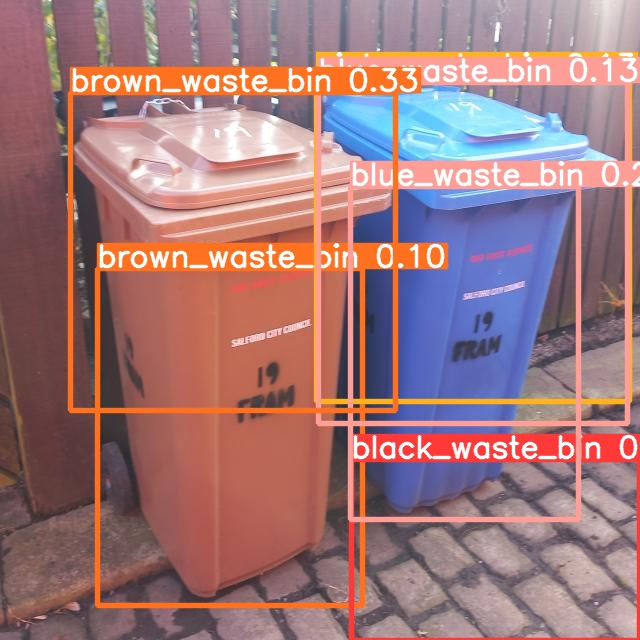

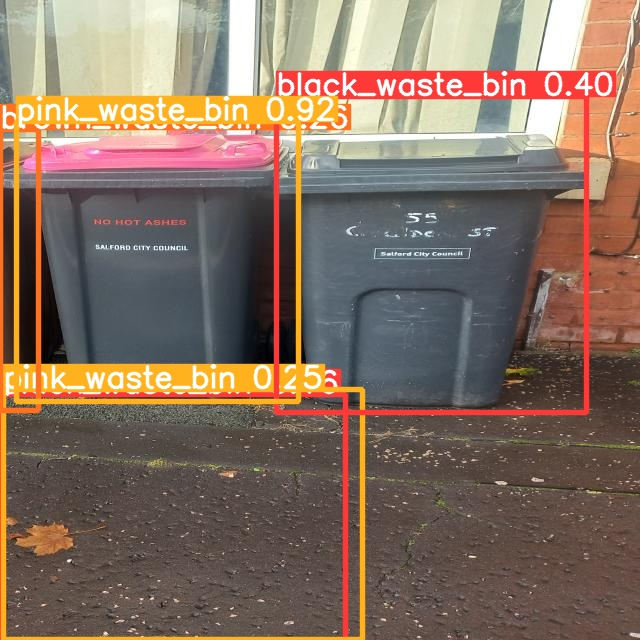

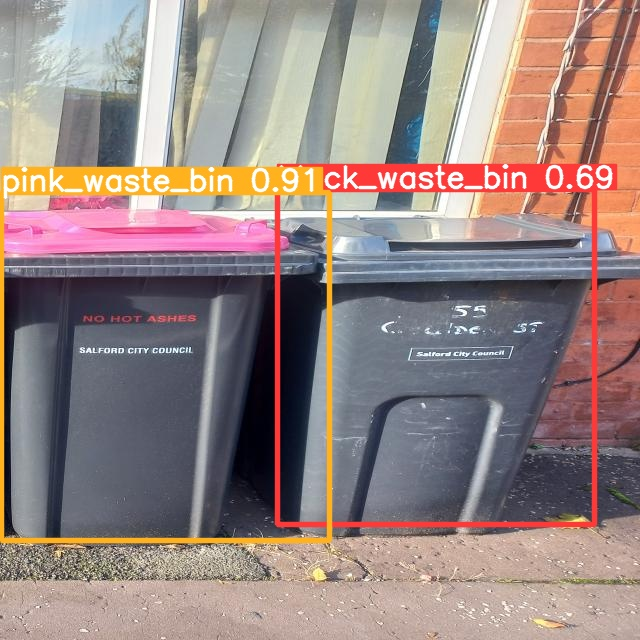

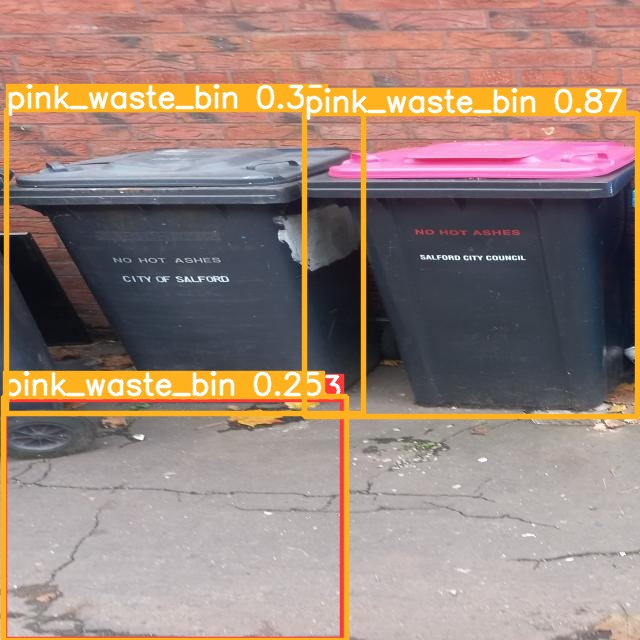

In [ ]:
import glob

# Display some test images
for image_path in glob.glob(f'/content/gdrive/MyDrive/yolov9/yolov9/runs/detect/exp14/*.jpg'):
      display(Image(filename=image_path, width=600))

In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*

  adding: runs/detect/ (stored 0%)
  adding: runs/detect/exp/ (stored 0%)
  adding: runs/detect/exp2/ (stored 0%)
  adding: runs/detect/exp3/ (stored 0%)
  adding: runs/detect/exp4/ (stored 0%)
  adding: runs/detect/exp5/ (stored 0%)
  adding: runs/detect/exp6/ (stored 0%)
  adding: runs/detect/exp7/ (stored 0%)
  adding: runs/detect/exp8/ (stored 0%)
  adding: runs/detect/exp9/ (stored 0%)
  adding: runs/detect/exp10/ (stored 0%)
  adding: runs/detect/exp11/ (stored 0%)
  adding: runs/detect/exp11/Waste_Bins-101-_jpg.rf.a7ab996cc38224fbd89810bb1d2e2679.jpg (deflated 3%)
  adding: runs/detect/exp11/Waste_Bins-102-_jpg.rf.a4e4c800f4381b9248a8af90f9998a5f.jpg (deflated 3%)
  adding: runs/detect/exp11/Waste_Bins-107-_jpg.rf.e2d2a313ada16d10b07f7e81de3ff33e.jpg (deflated 3%)
  adding: runs/detect/exp11/Waste_Bins-110-_jpg.rf.78b39aacaba1bf56bf1716085c8ed219.jpg (deflated 4%)
  adding: runs/detect/exp11/Waste_Bins-114-_jpg.rf.6f3f93dd54b92270de1d1d687d8d0021.jpg (deflated 3%)
  adding: runs